In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split


In [3]:
try:
    red = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_red.csv')
except:
    red = pd.read_csv('winequality_red.csv')
try:
    white = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_white.csv')
except:
    white = pd.read_csv('winequality_white.csv')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_col = red.columns.to_list()
white_col = white.columns.to_list()

In [6]:
def replace_col():
    '''
    Capitalize column names and remove space to '_', except 'pH' 
    '''
    new_red_col = []
    new_white_col = []
    for r, w in zip(red_col, white_col):

        if r =='pH' or w =='pH':
            new_r = r
            new_w = w
        else:
            new_r = r.title().replace(' ','_')
            new_w = w.title().replace(' ','_')

        new_red_col.append(new_r)
        new_white_col.append(new_w)
    red.columns = new_red_col
    white.columns = new_white_col

# replace column name
replace_col()

In [7]:
red.loc[red.Total_Sulfur_Dioxide>250,'Total_Sulfur_Dioxide'] = red.Total_Sulfur_Dioxide.mean()  #replace outliers with mean
white.loc[(white.Quality ==3) & (white.Total_Sulfur_Dioxide>=300), 'Total_Sulfur_Dioxide'] = white.Total_Sulfur_Dioxide.mean() #replace outliers with mean

In [8]:
red.head(30)

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
def ANN(df,dcol=[]):

    # import libraries
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense 
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.preprocessing import  StandardScaler
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from keras.utils import to_categorical



    #get train and target data
    X = df.iloc[:,:-1].drop(columns = dcol).values
    y = df.iloc[:,-1].values

    #turn y to categorial data
    cate_y = to_categorical(y)

    # split dataset to train-valid-test
    X_train, X_test, y_train, y_test = train_test_split(X, cate_y, test_size = 0.2, random_state = 42)
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train,y_train, test_size = 0.2, random_state=42)

    # scale dataset
    scaler = StandardScaler()
    scaled_X_train_v = scaler.fit_transform(X_train_v)
    scaled_X_test_v = scaler.transform(X_test_v)
    scaled_X_test = scaler.transform(X_test)


    #initiate Sequential
    nn_model = Sequential()

    #create two hidden layers
    # x_layer = len(cate_y[0,:])

    '''change layers over here'''

    # for i in range(x_layer):
    # nn_model.add(Dense(128, activation='relu'))
    # nn_model.add(Dropout(0.2))
    # nn_model.add(Dense(128, activation='relu'))
    nn_model.add(Dense(64, activation='relu'))
    nn_model.add(Dense(64, activation='relu'))


    

    # create output layer
    y_layer = len(cate_y[0,:])
    nn_model.add(Dense(y_layer, activation='softmax'))

    # compile the model
    nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # add early stop
    '''change early'''
    early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

    #fit model 
    nn_model.fit(scaled_X_train_v, y_train_v, batch_size=64, epochs=200, validation_data=(scaled_X_test_v, y_test_v), verbose=1, callbacks=[early_stop])


    # plot loss anda ccuracy
    loss_df = pd.DataFrame(nn_model.history.history)
    loss_df.plot()

    #make prediction
    y_pred = nn_model.predict(scaled_X_test)
    # print(y_pred)
    # get the true value from prediction
    true=[]
    pred=[]
    for t,p in zip(y_test, y_pred):
        true.append(np.argmax(t))
        pred.append(np.argmax(p))

    print(accuracy_score(true,pred))

    nn_model.summary()

 



Epoch 1/200
16/16 [==============================] - 1s 37ms/step - loss: 2.0027 - accuracy: 0.3496 - val_loss: 1.6322 - val_accuracy: 0.5531
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.5014 - accuracy: 0.5915 - val_loss: 1.3249 - val_accuracy: 0.5562
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 1.2768 - accuracy: 0.5523 - val_loss: 1.1702 - val_accuracy: 0.5594
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0940 - accuracy: 0.5835 - val_loss: 1.1050 - val_accuracy: 0.5562
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0795 - accuracy: 0.6052 - val_loss: 1.0610 - val_accuracy: 0.5813
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0306 - accuracy: 0.6125 - val_loss: 1.0340 - val_accuracy: 0.5813
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9988 - accuracy: 0.6133 - val_loss: 1.0143 - val_accuracy: 0.5813
Epoch 8/200


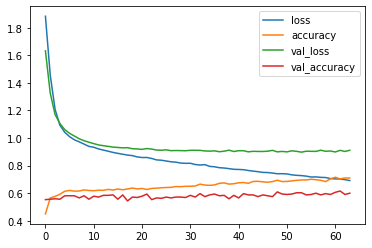

In [10]:
ANN(red, ['Free_Sulfur_Dioxide','Citric_Acid'])

Epoch 1/200
49/49 [==============================] - 1s 7ms/step - loss: 1.9652 - accuracy: 0.3032 - val_loss: 1.3237 - val_accuracy: 0.4878
Epoch 2/200
49/49 [==============================] - 0s 3ms/step - loss: 1.2877 - accuracy: 0.5031 - val_loss: 1.2113 - val_accuracy: 0.5184
Epoch 3/200
49/49 [==============================] - 0s 3ms/step - loss: 1.1758 - accuracy: 0.5470 - val_loss: 1.1644 - val_accuracy: 0.5327
Epoch 4/200
49/49 [==============================] - 0s 3ms/step - loss: 1.1285 - accuracy: 0.5578 - val_loss: 1.1552 - val_accuracy: 0.5214
Epoch 5/200
49/49 [==============================] - 0s 3ms/step - loss: 1.1150 - accuracy: 0.5552 - val_loss: 1.1285 - val_accuracy: 0.5388
Epoch 6/200
49/49 [==============================] - 0s 3ms/step - loss: 1.0584 - accuracy: 0.5689 - val_loss: 1.1183 - val_accuracy: 0.5378
Epoch 7/200
49/49 [==============================] - 0s 3ms/step - loss: 1.0540 - accuracy: 0.5784 - val_loss: 1.1177 - val_accuracy: 0.5398
Epoch 8/200
4

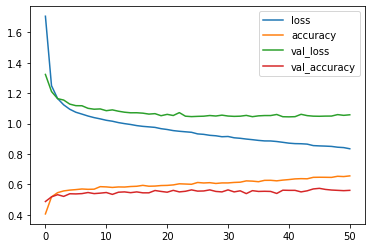

In [11]:
ANN(white, ['Residual_Sugar'])